In [ ]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

IMG_SIZE = 64
CHANNELS = 1  


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:

data_dir = '/content/drive/MyDrive/Autistic_cleandata'

def preprocess(img, label):
    img = tf.image.rgb_to_grayscale(img)
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = tf.cast(img, tf.float32) / 255.0
    return img, label

data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(256, 256), 
    batch_size=32,
    label_mode='int'
)


Found 2897 files belonging to 2 classes.


In [ ]:
data = data.map(preprocess).cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

train_size = int(0.75 * len(data))
val_size = int(0.15 * len(data))
test_size = int(0.1 * len(data))

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)


In [ ]:
# from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# model = Sequential([
#     Input(shape=(IMG_SIZE, IMG_SIZE, CHANNELS)),
#     Conv2D(8, (3,3), activation='relu'),
#     MaxPooling2D(),
#     Conv2D(16, (3,3), activation='relu'),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(16, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])


from tensorflow.keras import layers

model = Sequential([
    layers.InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, CHANNELS)), 
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │        50,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,457 (201.00 KB)

 Trainable params: 51,457 (201.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2)

history = model.fit(train, epochs=20, validation_data=val, callbacks=[early_stop, reduce_lr])


Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.5595 - loss: 0.6857 - val_accuracy: 0.6370 - val_loss: 0.6325 - learning_rate: 0.0010
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.6788 - loss: 0.6108 - val_accuracy: 0.6490 - val_loss: 0.6135 - learning_rate: 0.0010
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6396 - loss: 0.6278 - val_accuracy: 0.6947 - val_loss: 0.5913 - learning_rate: 0.0010
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6758 - loss: 0.5845 - val_accuracy: 0.7212 - val_loss: 0.5405 - learning_rate: 0.0010
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.7185 - loss: 0.5613 - val_accuracy: 0.7452 - val_loss: 0.5281 - learning_rate: 0.0010
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.7464 - loss: 0.5396 - val_accuracy: 0.7356 - val_loss: 0.5129 - learning_rate: 0.0010
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7451 - loss: 0.5210 - val_ac

In [ ]:

model.evaluate(test)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8582 - loss: 0.3339


[0.3088158369064331, 0.8819444179534912]

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


precision = Precision()
recall = Recall()
binary_accuracy = BinaryAccuracy()


for batch in test.as_numpy_iterator():
    X, y_true = batch
    y_pred = model.predict(X)

    precision.update_state(y_true, y_pred)
    recall.update_state(y_true, y_pred)
    binary_accuracy.update_state(y_true, y_pred)

print(f"Test Accuracy     : {binary_accuracy.result().numpy() * 100:.2f}%")
print(f"Test Precision    : {precision.result().numpy() * 100:.2f}%")
print(f"Test Recall       : {recall.result().numpy() * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Test Accuracy     : 87.85%
Test Precision    : 88.16%
Test Recall       : 88.74%


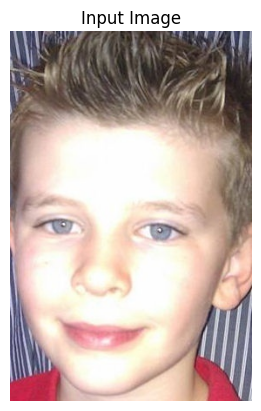

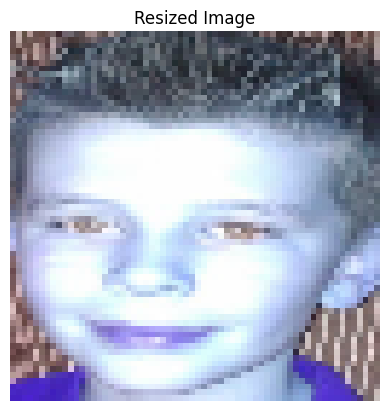

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Raw prediction: 0.5785
Predicted: Not Autistic


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

IMG_SIZE = 64  


img_path = '/content/drive/MyDrive/AutismDataset/test/Autistic.112.jpg'
img = cv2.imread(img_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Input Image")
plt.show()


resize = tf.image.resize(img, (IMG_SIZE, IMG_SIZE)) 

plt.imshow(resize.numpy().astype(np.uint8))
plt.axis('off')
plt.title("Resized Image")
plt.show()


input_tensor = np.expand_dims(resize / 255.0, axis=0) 
if input_tensor.shape[-1] != 1:

    input_tensor = tf.image.rgb_to_grayscale(input_tensor)

pred = model.predict(input_tensor)

print(f"Raw prediction: {pred[0][0]:.4f}")
if pred > 0.5:
    print("Predicted: Not Autistic")
else:
    print("Predicted: Autistic")


In [25]:
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np
# import tensorflow as tf

# IMG_SIZE = 64  # your model input size

# # === 1. Load, resize, and normalize image ===
# img_path = '/content/drive/MyDrive/AutismDataset/test/Autistic.112.jpg'
# img = cv2.imread(img_path)

# # Resize and normalize in one step
# img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0  # Normalize the image while resizing

# # Convert to uint8 before color conversion
# img_resized = (img_resized * 255).astype(np.uint8)

# # === 2. Convert to grayscale if needed ===
# img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)  # If the model expects grayscale images

# # === 3. Expand dimensions to match input shape ===
# input_tensor = np.expand_dims(img_resized, axis=0)  # shape: (1, IMG_SIZE, IMG_SIZE, 1) for grayscale

# # === 4. Predict ===
# pred = model.predict(input_tensor)

# # === 5. Output prediction ===
# print(f"Raw prediction: {pred[0][0]:.4f}")
# if pred > 0.5:
#     print("Predicted: Not Autistic")
# else:
#     print("Predicted: Autistic")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Raw prediction: 1.0000
Predicted: Not Autistic


In [41]:
model.save('tiny_autism_model2.h5')

In [31]:
!pip install hls4ml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.6 MB/s eta 0:00:00


In [33]:
from tensorflow.keras.models import load_model
model = load_model('tiny_autism_model.h5')
